__*SHAMSUDDEEN YUSUF*__
ASSIGNMENT 3
ADS/P7/24/035

__Import the necessary library__

Data source [student-sleep-monitoring-datasets](https://www.kaggle.com/datasets/valencaycodes/simulated-student-sleep-dataset)

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Load the dataset__

In [300]:
sleep_df = pd.read_csv('simulated_student_sleep_data.csv')
sleep_df.head()

,Student_ID,Sleep_Hours,Stress_Level,Year,Major,Use_Sleep_Tech,Sleep_Issues,GPA
0,STUD001,7.1,3,3rd,Arts,Yes,Yes,3.76
1,STUD002,6.3,7,3rd,Commerce,No,No,3.68
2,STUD003,7.3,9,1st,Science,No,No,3.59
3,STUD004,8.3,7,3rd,Commerce,Yes,Yes,3.40
4,STUD005,6.2,3,3rd,Arts,No,Yes,3.72


__Data info__

In [301]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student_ID      50 non-null     object 
 1   Sleep_Hours     50 non-null     float64
 2   Stress_Level    50 non-null     int64  
 3   Year            50 non-null     object 
 4   Major           50 non-null     object 
 5   Use_Sleep_Tech  50 non-null     object 
 6   Sleep_Issues    50 non-null     object 
 7   GPA             50 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.3+ KB


__Data summary description__

In [302]:
sleep_df.describe()

,Sleep_Hours,Stress_Level,GPA
count,50.000000,50.0000,50.000000
mean,6.222000,5.8000,3.540600
std,1.129979,2.2315,0.257875
min,4.100000,3.0000,2.950000
25%,5.450000,4.0000,3.392500
50%,6.200000,5.0000,3.520000
75%,6.900000,8.0000,3.742500
max,8.700000,9.0000,4.000000


__Data Shape__

In [303]:
sleep_df.shape

(50, 8)

__Checking for missing value__

In [304]:
sleep_df.isnull().sum()

Student_ID        0
Sleep_Hours       0
Stress_Level      0
Year              0
Major             0
Use_Sleep_Tech    0
Sleep_Issues      0
GPA               0
dtype: int64

There is no missing value in the dataset

In [305]:
# Convert stress levels to categorical
sleep_df['Stress_Level'] = sleep_df['Stress_Level'].astype('category')

What is the minimum and maximum sleeping hours 

In [306]:
# Maximum sleep duration
max_sleep = sleep_df['Sleep_Hours'].max()
print(f"Maximum sleep duration: {max_sleep} hours")

# Minimum sleep duration
min_sleep = sleep_df['Sleep_Hours'].min()
print(f"Minimum sleep duration: {min_sleep} hours")

Maximum sleep duration: 8.7 hours
Minimum sleep duration: 4.1 hours


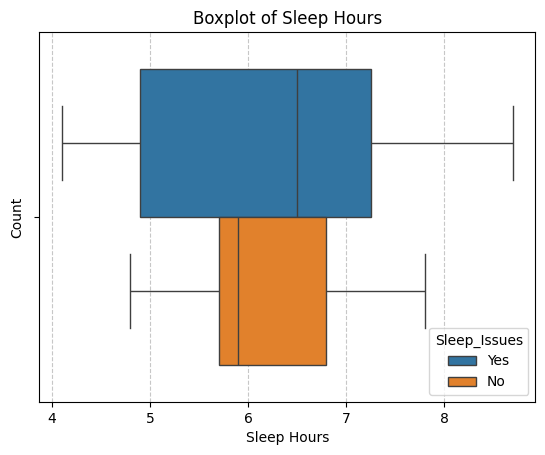

In [307]:
# does the data have any outliers?
sns.boxplot(x='Sleep_Hours', data=sleep_df, hue='Sleep_Issues')
plt.title('Boxplot of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The dataset is devoid of any outlier

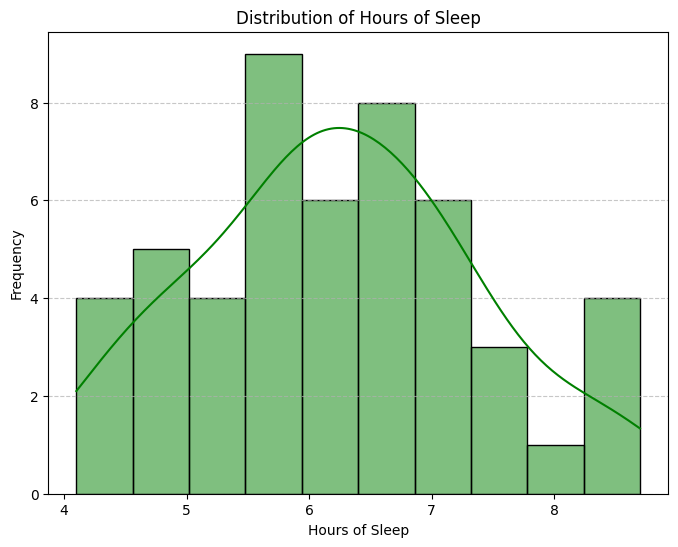

In [308]:
# Visualizing the distribution of sleep hours
plt.figure(figsize=(8, 6))
sns.histplot(x='Sleep_Hours', data=sleep_df, bins=10, color='green', edgecolor='black', kde=True)
plt.title('Distribution of Hours of Sleep')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The distribution is approximately a bell shape, which means most people sleeping hours is within the average. 
This means that, the mean, median and the mode of the are almost or exactly equal.

let compute the mean, median and mode.

In [309]:
# mean sleep hours
mean_sleep = sleep_df['Sleep_Hours'].mean()
print(f"Mean Sleep Hours: {round(mean_sleep, 2)} hours")

# median sleep hours
median_sleep = sleep_df['Sleep_Hours'].median()
print(f"Median Sleep Hours: {round(median_sleep, 2)} hours")

# mode sleep hours
mode_sleep = sleep_df['Sleep_Hours'].mode()[0]
print(f"Mode Sleep Hours: {mode_sleep} hours")

Mean Sleep Hours: 6.22 hours
Median Sleep Hours: 6.2 hours
Mode Sleep Hours: 5.8 hours


Although the mode differes with the mean and median but a conclusion can be made to say most student sleep for 6 hours.

Is there any relationship between the number of hours a student sleep and his GPA?

Let see the correlation between the two.

In [310]:
# Sleep hours and GPA correlation
print(f"Correlation between Sleep Hours and GPA: {round(sleep_df['Sleep_Hours'].corr(sleep_df['GPA']),3)}")

Correlation between Sleep Hours and GPA: 0.303


There is correlation between although not very strong. However student the GPA is somewhat proportional to the sleeping hours. Most likely the student that sleeps tend to have relatively better GPA.

Let visualize the relationship using scatter plot

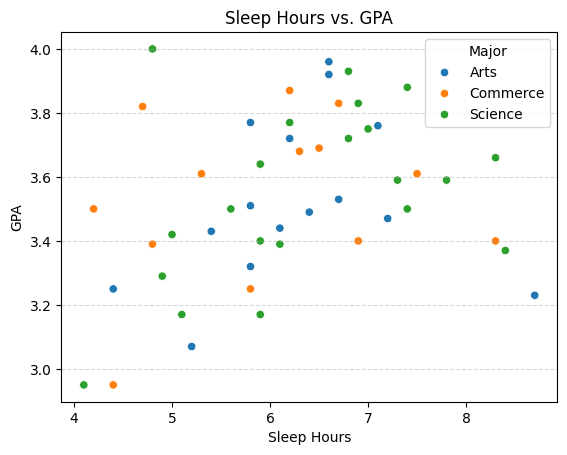

In [311]:
# Scatter plot to visualize the relationship between sleep hours and GPA
sns.scatterplot(x='Sleep_Hours', y='GPA', data=sleep_df, hue='Major')
plt.title('Sleep Hours vs. GPA')
plt.xlabel('Sleep Hours')
plt.ylabel('GPA')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

From the scatter plot its evident, that science student GPA is more affected by their sleeping hours compare to their counterpart.

Heatmap can equally be used for digital correlation visualization

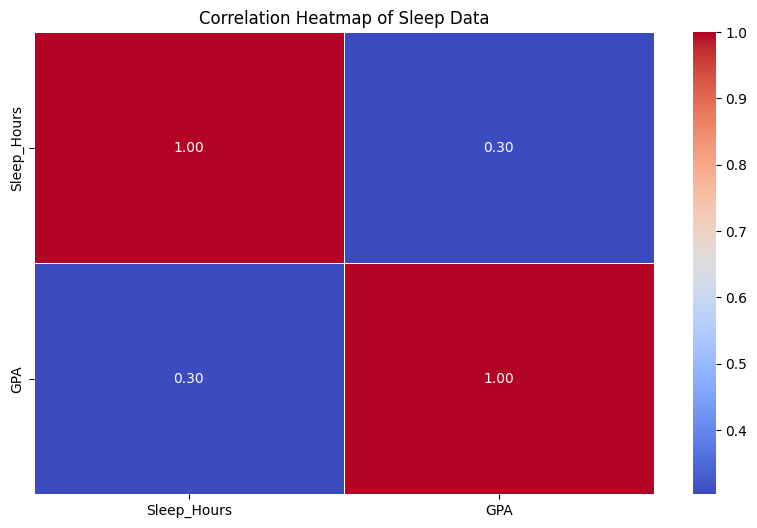

In [312]:
# Visualizing the correlation of sleep hours
plt.figure(figsize=(10, 6))
sns.heatmap(sleep_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Sleep Data')
plt.show()

In [313]:
# Science Major Correlation
science = sleep_df[sleep_df['Major'] == 'Science']
print(f"Science Major Correlation: {(science.Sleep_Hours).corr(science.GPA)}")

# Arts Major Correlation
art = sleep_df[sleep_df['Major'] == 'Arts']
print(f"Art Major Correlation: {(art.Sleep_Hours).corr(art.GPA)}")

# Commerce Major Correlation
commerce = sleep_df[sleep_df['Major'] == 'Commerce']
print(f"Commerce Major Correlation: {(commerce.Sleep_Hours).corr(commerce.GPA)}")

Science Major Correlation: 0.4119118831205371
Art Major Correlation: 0.21385699970647684
Commerce Major Correlation: 0.2229598674659267


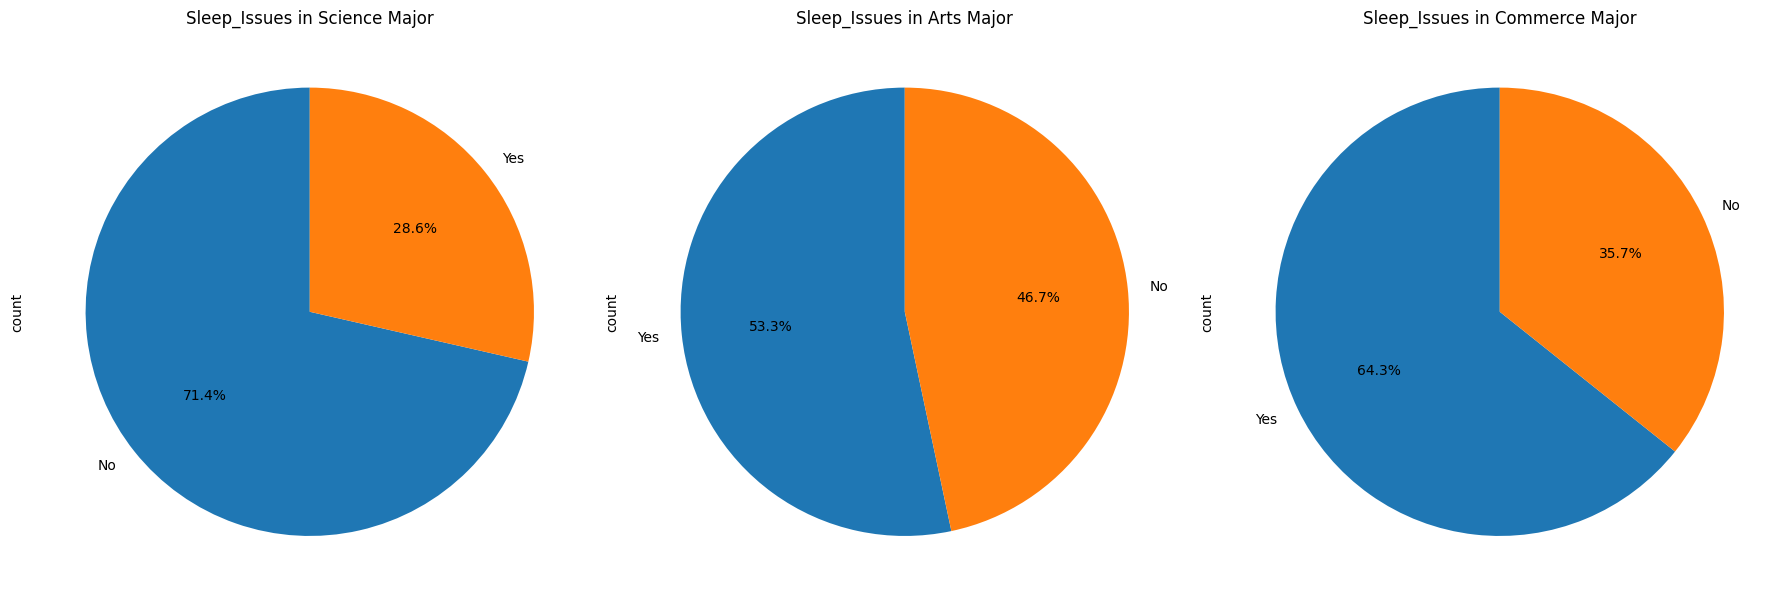

In [314]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
science['Sleep_Issues'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Sleep_Issues in Science Major', ax=ax[0])
art['Sleep_Issues'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Sleep_Issues in Arts Major', ax=ax[1])
commerce['Sleep_Issues'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Sleep_Issues in Commerce Major', ax=ax[2])
plt.tight_layout()
plt.show()

The pie chart shows that there are fewer science student with sleeping issues then in other majors. Majority of the science student does not have sleeping issues and the reverse is the case for the other students from Art and Commerce.

Another question is what is the effect of using tech aid for sleeping does it matter too?

let visualize another pie chart to see

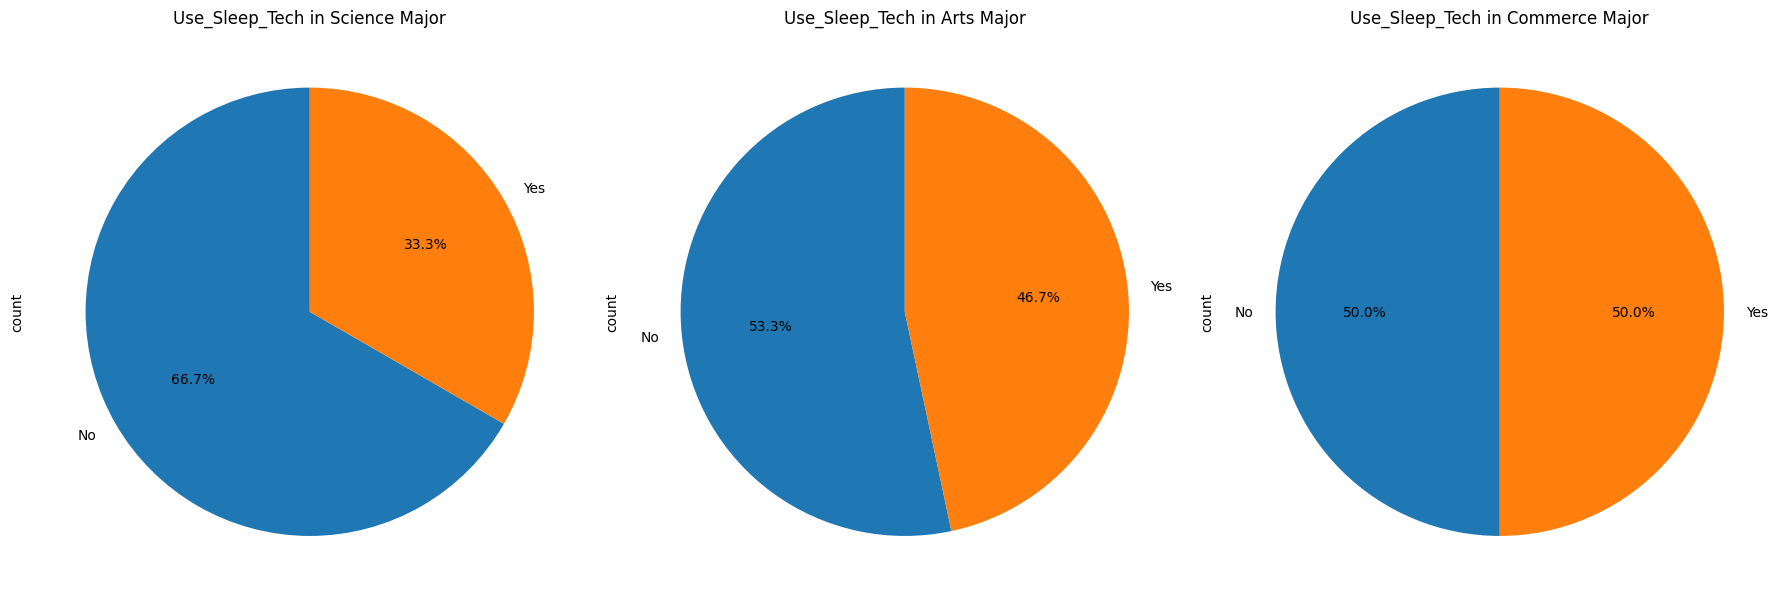

In [315]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
science['Use_Sleep_Tech'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Use_Sleep_Tech in Science Major', ax=ax[0])
art['Use_Sleep_Tech'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Use_Sleep_Tech in Arts Major', ax=ax[1])
commerce['Use_Sleep_Tech'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Use_Sleep_Tech in Commerce Major', ax=ax[2])
plt.tight_layout()
plt.show()

Another point worthy of notice is that most science student does not use tech to sleep, unlike the students of the other major, that uses it more to aid their sleeping.

Another factor worthy of consideration is the stress level 

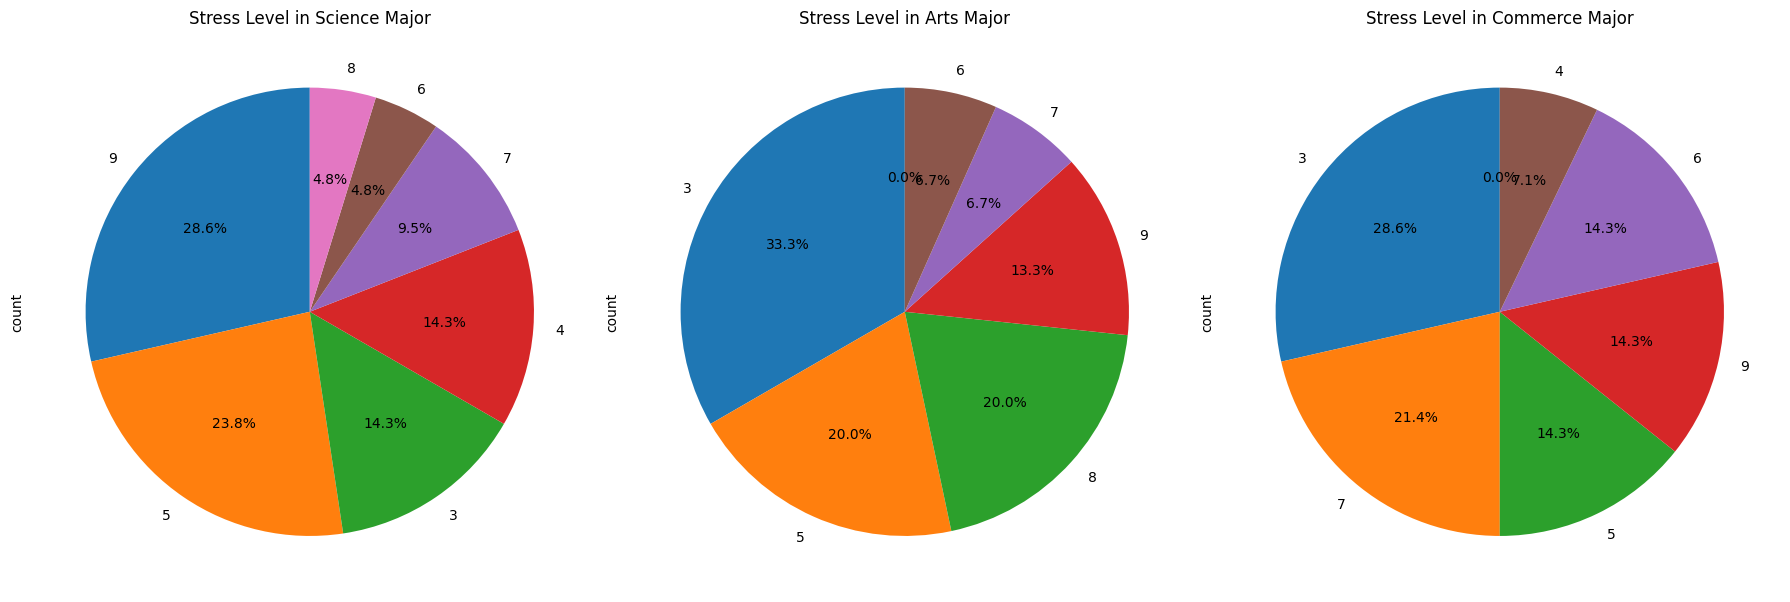

In [316]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
science['Stress_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Stress Level in Science Major', ax=ax[0])
art['Stress_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Stress Level in Arts Major', ax=ax[1])
commerce['Stress_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Stress Level in Commerce Major', ax=ax[2])
plt.tight_layout()
plt.show()

Science students are more stressed out, hence they sleep more, which in return give them advantage of obtaining higher GPA. The stress may be due computation, laboratory experiment or field trips as the case may be.

In [317]:
sleep_df['Year'].value_counts()

Year
3rd    15
4th    14
1st    11
2nd    10
Name: count, dtype: int64

The number of student in each level of study from which the data was collected

In [318]:
sleep_df["Major"].value_counts()

Major
Science     21
Arts        15
Commerce    14
Name: count, dtype: int64

The number of students based on their major.